Note, before we begin, that racial profiling is bad. It was not a typo and we are not in fact doing that.


# Radial Profiling

Stars are far enough away that they should be infintesimally small point sources in simplified theory. However, light gets scattered and dispersed on it's journey to us from the star, and by the time it reaches us stars appear as circles, though still very small ones.
Radial profiling, in this context, refers to when we look at how things change as a function of radius. There is one specific thing we want to verify in this stage, but we can also use some data we gain along the way to be less general in the next stage; photometry.

Scattering is a physical process, and is absolutely included and covered in the course material, although it is scheduled to be later in the semester. As a result of that, we will lean on the safe side, and assume you haven't covered it in depth yet.

## Introduction to scattering (and what/why we'd do radial profiling)

Scattering is a collection of processes where photons are deflected slightly on their journey to us from the star. These might be things like gravitatonal lensing, or light being absorbed and then reemitted but dust, or a wide variety of other things.
For the sake of being able to proceed and do calculations, we will assume that the number of times a photon gets deflected, and how much it gets deflected by, are both Completely Random. If we were to then look at a distribution of where photons from a single point source would end up, we should see the shape of a Gaussian.

Now, the number of photons at a location is more commonly known as the 'brightness' (or intensity or flux, but hopefully you know that ;p), which we can measure as the value recorded in a pixel.

-bucket analogy review-

We want to make sure we're not splashing water out of our bucket, and we can check that pretty easily. If we compare how much water is in a bucket compared to it's neighbours, and make a plot of this, we don't need to know how much water constitutes a full bucket. Rather, we should just not see any flat bits; the neighbours should always have less water in them.

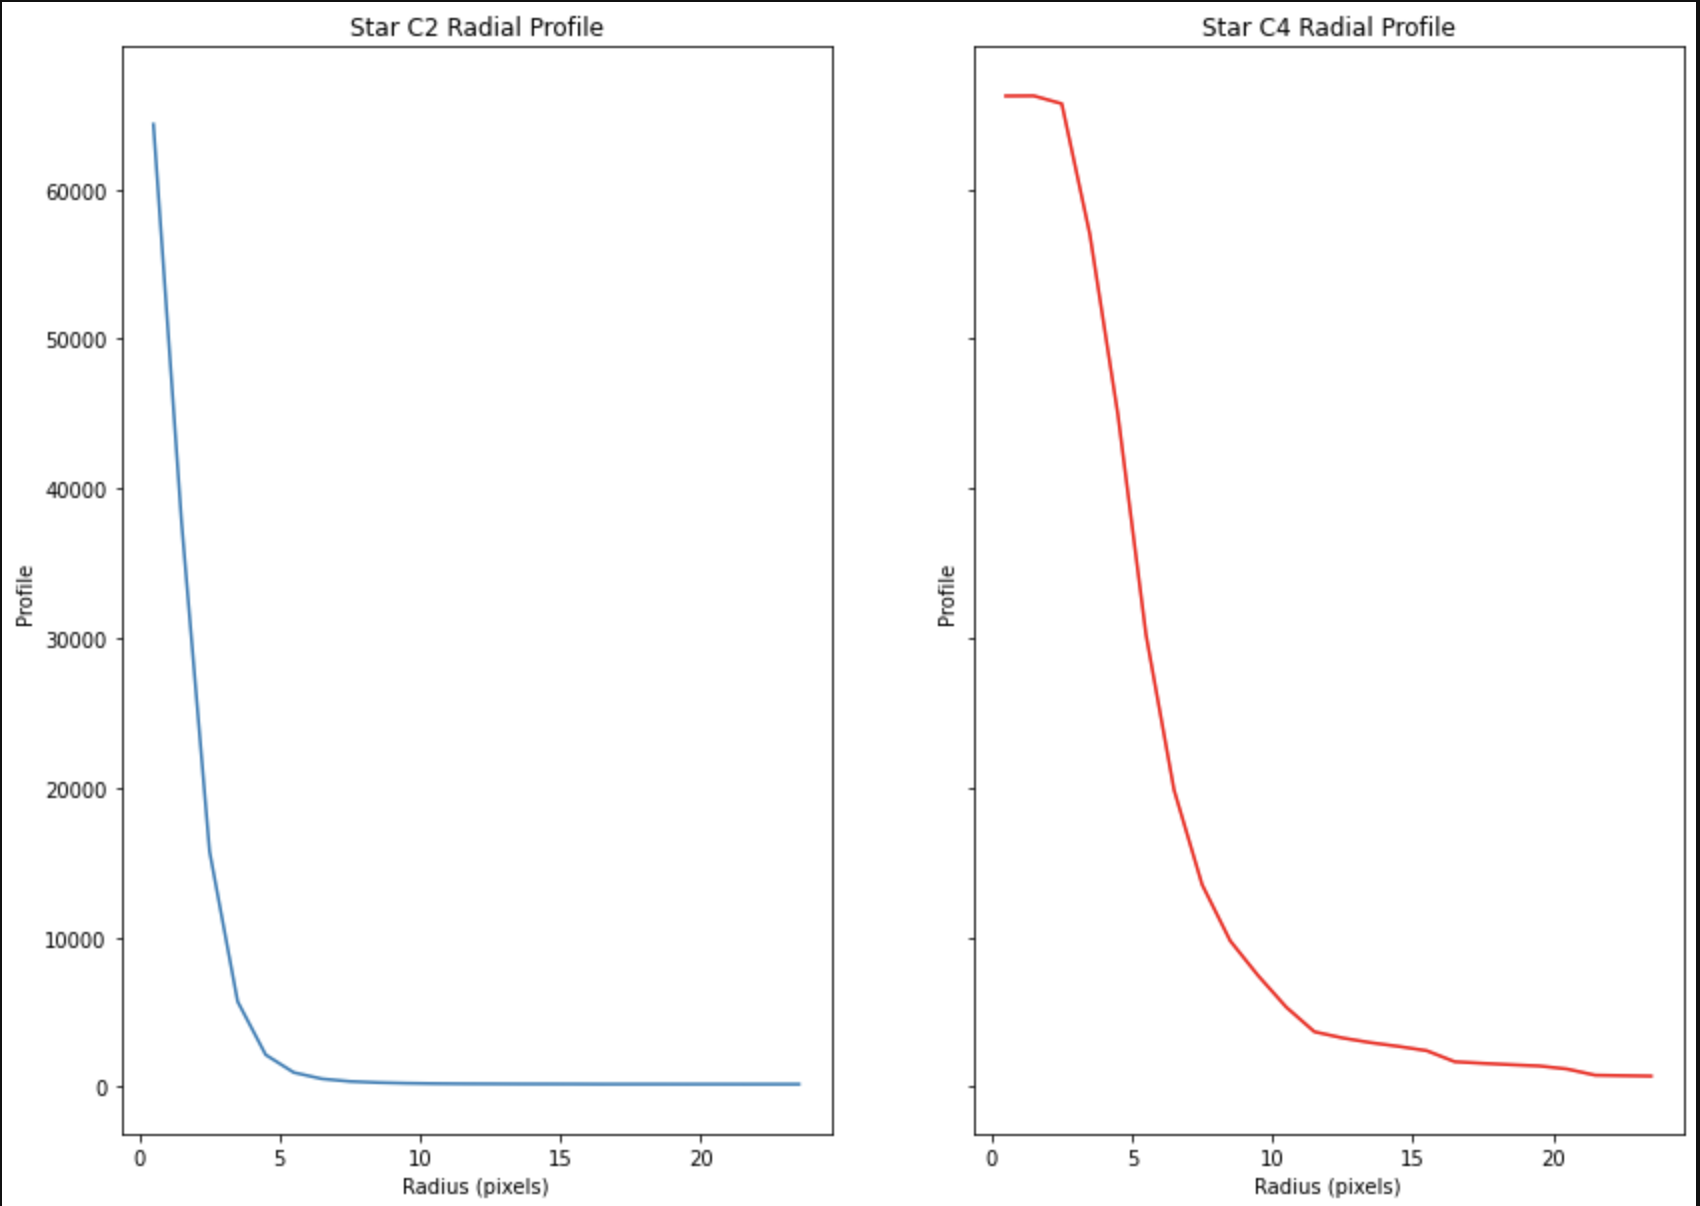

So we firstly check to make sure that our Radial Profiles follow a gaussian. But, once we do that, there's a very helpful thing we can look at: 
Since we had to figure out the parameters of a gaussian that would fit our data, we can use the standard deviation as a proportionality constant to define our photometric values (namely, the radius of the area we'll add up the light from).
We'll just use some factor times that value, and then we can be absolutely certain we'll get the significant majority of the light from a star in our area. (while also being sure that we don't have too much area that doesn't have a significant amount of light that's being included)

-------
will need to rework these descriptions into a logical order:


Firstly we're checking to make sure that our target star is not oversaturated; CCDs have a pretty limited response. In our bucket analogy, this is like how much water can fit into a bucket. if we dump in more water than could fit, then it will spill out.
To premptively answer why that would be bad since, following the analogy, if we wanted to figure out how much water was dumped, we could still get the total volume, since the water has just moved into the surrounding buckets, so it's helpful to clarify why that won't be something we can do. 
As might be expected, the problem lies in the analogy. The CCD is not actually counting photons; it is counting electrons. When a photon enters the 'bucket' the idea is that we have a material there which will have a (or a consistent number of) electron(s) which have that photons energy transferred to them, and they then go zooming off, and we can then record the voltage when we're done collecting. But, if we knock off a lot of electrons, it starts to get less and less consistent. -Need to ask Laura to help (re)explain to me how we had got to that value of like 66250 or whatever, ((2^16 = 65536)) ((16 bit resolution?)) -
As in, when water splashes out of our full bucket, it might not splash into a neighbour.

So we want to make sure we're not splashing water out of our bucket. 

# Process & Psuedocode

So that's the idea behind what we're doing. The process is actually incredibly simple;
we'll open up some subset of our images. This could be as few as a single image, or you could use all of your images, it all depends on how much of a sample you feel is representative. Note though that we will need to choose only a single (average) value at the end to use, so checking every image is usually unnecessary unless you're troubleshooting other problems.

You should be doing this stage after you've "Plate Solved" your images using Astrometry.net, and after you've "named" the bright stars and saved their locations. Both of those steps will be relevant and used, so you need to make sure that they're done before you start this.

For a single image: 
we will first want to open up the image, and then get the locations of all the named stars from the file that we saved (nameloc.csv)

We will then iterate through each star (name); we'll get it's location; ie the centre of it's gaussian spread, which is it's peak, and we will then look at it's surounding points, and plot/record their pixel value and radius (distance from the centre). 
It will be up to you to look at this plot and judge whether or not it's flat at the top. If you suspect it is, reach out to the TA to confirm and get assistance as to what you should do next. (this will likely be try again to get data, but it may be an alternative, like borrowing another groups data depending on the timing and severity) 

We will then take this data we plotted, and fit a gaussian to it. We will be fitting for only the standard deviation and the amplitude, since the mean should be zero (the gaussian should be centered on the origin).

We will then record these parameters in an external location, and then continue iterating through all the named stars for that image.

We can then check and see what the average is, and what the values are, and use that to inform whether we continue doing it for more images.

Once we're satisfied that we are not oversaturated, and we have a representative value for the standard deviation, we will use that value to define the radii that we will use for our apertures. 
At this point, we will take the existing data file containing the name and locations of our stars, and add in a handful more columns with these radii, which will be the definitions of our apertures (apertures.csv)


## note:

you should find that the deviation of the gaussians are pretty similar for stars in the same image, even if they are not as bright, and don't appear near as large.
This is because scattering is a physical process influenced and characterized by things in the real world. We are looking at a very small patch of sky, and the photons took basically the same path to get to us, which means they all encountered the same obstacles. (most of the scattering happens in the Earths atmosphere, so it really doesn't matter that the stars are actually vastly different distances away; it's only right at the end that most of the scattering happens)
As such, the radius at which the brightness is half of the peak value will be pretty similar.

You should also probably find that it's fairly consistent throughout your images; if it's not that's likely a symptom of a different issue that would ruin your data set, so you should be wary if that seems to be the case.

The following is a graph of the average FWHM (width) of the gaussian that fit the radial profiles of all the stars for a test observation session from this summer. There were other problems with the session, but despite that the parameters are visibly fairly consistent. It can also be seen though that the amplitude changes a lot, however, the FWHM and std don't change much. (they are also directly proportional, or at least they should be, which is why I've plotted them and their difference while I was troubleshooting)
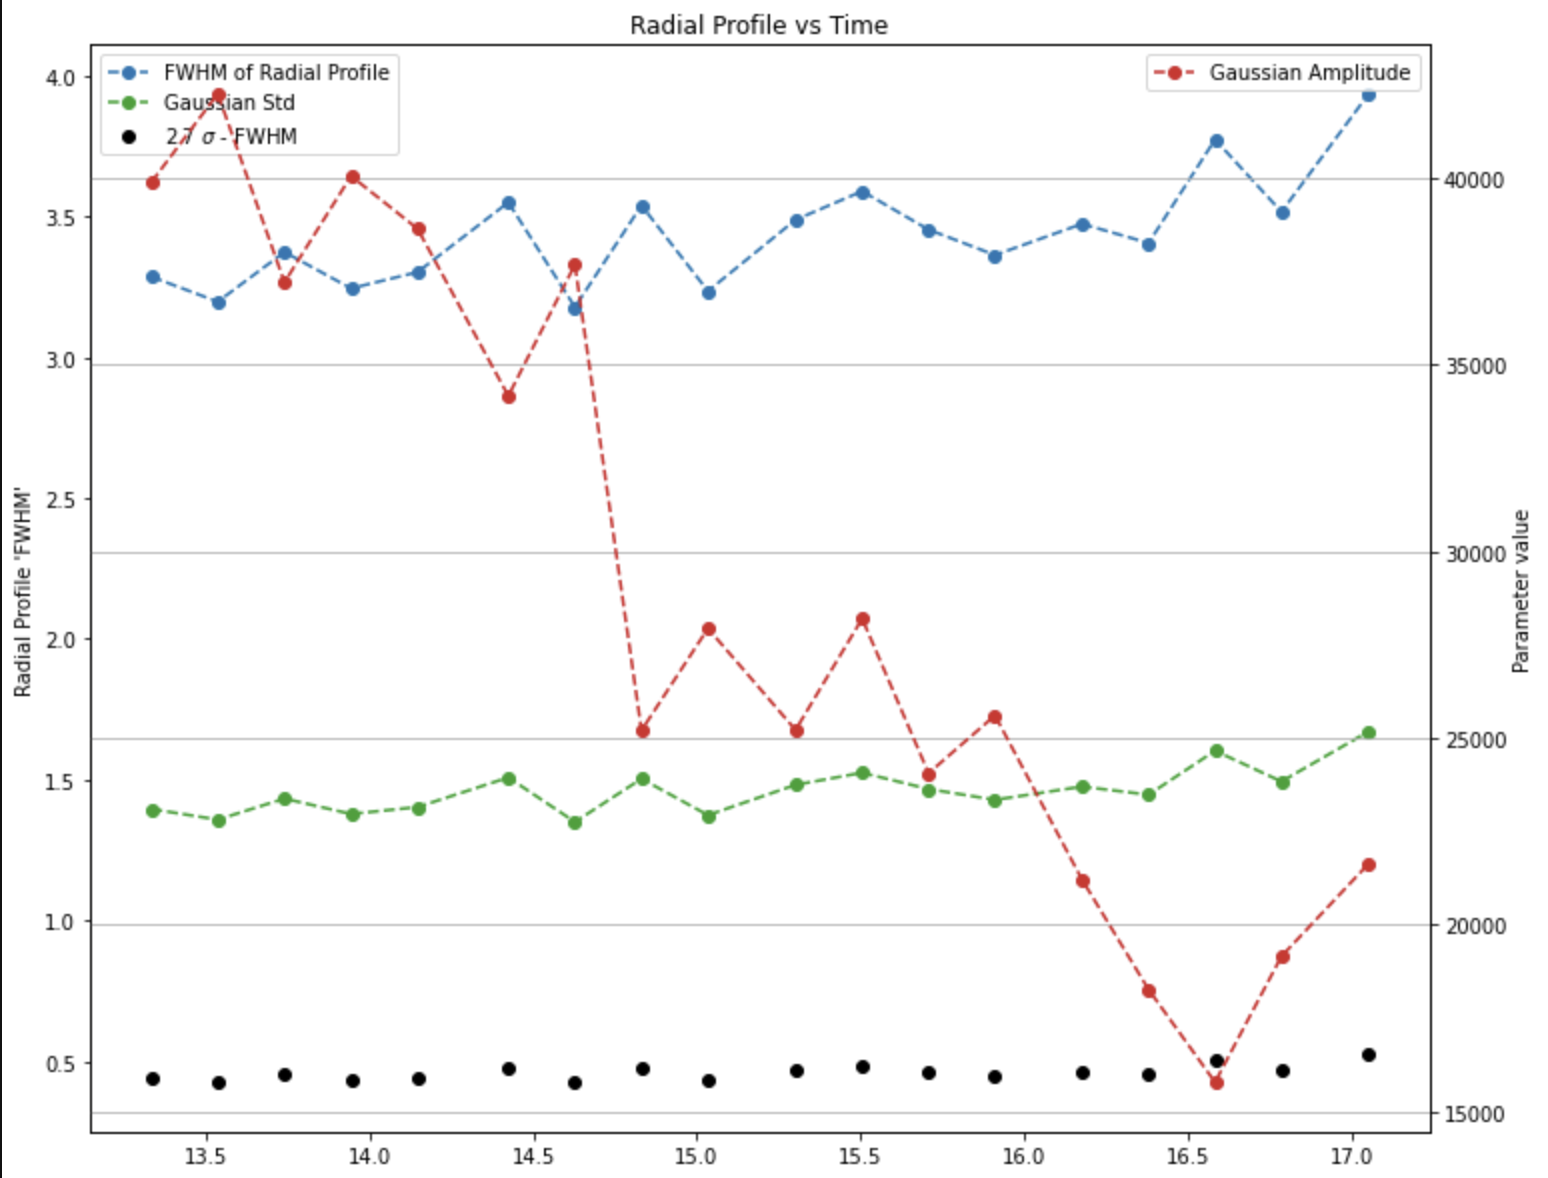

# Psuedocode

- import the photutils packages?

- open up the list of named stars and their locations
- generate an externally stored list of the radii and parameters from radial profile fitting

Adding an images data:
1. open up the image, and get the things we need; image, and the WCS info.
2. For each named star/location:
    1. Generate the radial profile for that location
    2. (if it's the star we care about (default to 'target') then show a plot of it's radial profile.
    3. Fit a gaussian to that radial profile
    4. dump the extra stuff and return the parameters
3. be able to display the results; ie, see the average and whatnot.

Finishing and creating aperture file:
1. create a new table that's a copy of the names and locations
2. use the value that we've found (either grab the median from some saved/stored data, or input it manually) to generate/calculate the radii that we care about.
3. add a new column to the table for these radii, where all the values are the same 
4. save the new table as "apertures.csv"

In [1]:
#import statements
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS

#from photutils.aperture import aperture_photometry, CircularAperture, SkyCircularAperture, SkyCircularAnnulus, ApertureStats
#from photutils.aperture import 
from astropy.coordinates import SkyCoord#, FK5
from astropy.wcs.utils import skycoord_to_pixel
#from astropy.stats import sigma_clipped_stats
#from astropy.timeseries import TimeSeries
#from photutils.detection import find_peaks
from photutils.centroids import centroid_quadratic
from photutils.profiles import RadialProfile
#from scipy.optimize import curve_fit

In [2]:
nameLocTable = Table.read('nameloc.csv')
print(nameLocTable)

 Name          RA                DEC       
------ ------------------ -----------------
   sCA       286.90466917       49.05028138
   sCB       287.16389622       49.05347225
   sCD       287.22654558       49.05942281
   sCE       286.67463815       49.08638769
   sCF        286.7704238       49.09110339
   sCG       286.77672522       49.11508899
   sCH       287.11547812       49.12396441
   sCI       287.41663541       49.22759817
    sA       286.46315164       49.30767114
    sB        286.8085626       49.31639915
   ...                ...               ...
   sCL       286.47444738        49.4375753
   sBA       286.70276313       49.44250155
   sBB       287.14774105       49.46122051
   sBC       286.53864766       49.50311876
   sBD       286.67159369        49.5014282
   sBE       286.80273809       49.50341298
   sCM       287.41863945       49.50150268
   sCN       287.39894872       49.51016755
   sCO        286.5524334       49.53424676
   sCP        286.5972112       

In [3]:
#imports needed: centroid_quadratic, radialprofile, numpy
def loadFWHMSFromHighSources(image,wherehigh,src=False,sources=None,debug=False):

    sources = loadSources(src=src,sources=sources,debug=debug)
    
    highx = np.take(sources['xcentroid'],wherehigh)
    highy = np.take(sources['ycentroid'],wherehigh)
    if debug: 
        print("High centorids:")
        print(highx)
        print(highy)
        
    #sort through all of the high stars and determine the fwhm to use for the aperture radius.
    fwhms = np.zeros(len(wherehigh))
    for i,n in enumerate(wherehigh):
        xycen = centroid_quadratic(image, xpeak=highx[i], ypeak=highy[i])
        edge_radii = np.arange(26)
        rp = RadialProfile(image, xycen, edge_radii, mask=None)
        #print(rp.gaussian_fwhm)
        fwhms[i] = rp.gaussian_fwhm
    medfwhm = np.median(fwhms)
    if debug:
        print("FWHM Array (units of pixels):")
        print(fwhms)
        print("Median of array (units of pixels):")
        print(medfwhm) #this is the value that should, in theory, be used for the radius.
        #it is in units of pixels.
    return fwhms, medfwhm

In [4]:
def loadFWHMSFromImage(imgFilepath,namelocTab,edges_to_test=26,box_to_search=5):
    """
    edges_to_test: the highest radius (in pixels) for which we will do our radial profile. This should be garunteed to be bigger than the star.
    box_to_search: the number of pixels in any direction from the peak values that we will allow the peak of the centroid to be.
    """
    #so, we'll need to open up the image, and the wcs data. 
    with fits.open(imgFilepath) as hdul:
        wcs = WCS(hdul[0].header)
        #print(wcs)
        image = hdul[0].data
    #Next, we will go through each of our named locations
    #print(image)
    fwhms={}
    for namedloc in namelocTab:
        #By using a "For" loop, we should get the rows.
        #we need to generate a radial profile for that location.
        #first we need to convert our RA and DEC to pixels.
        sc = SkyCoord(ra=namedloc['RA']*u.deg,dec=namedloc['DEC']*u.deg)
        #print(sc)
        pixcoord = skycoord_to_pixel(sc,wcs=wcs)
        #print(pixcoord)
        #now that we have the coordinates in pixels, we can generate the radial profile
        rp = RadialProfile(image,pixcoord,np.arange(edges_to_test),mask=None)
        #https://photutils.readthedocs.io/en/stable/api/photutils.profiles.RadialProfile.html#photutils.profiles.RadialProfile
        #the various properties are gaussian_fit, gaussian_fwhm, radius, profile, profile_error, gausian_profile, area, apertures
        #as well, RadialProfile objects have a normalize() and plot() method which may be useful.
        #print(rp)
        #print(rp.gaussian_fwhm)
        #print(rp.gaussian_fit)
        #rp.plot()
        #plt.show()
        #now we save that FWHM:
        fwhms[namedloc['Name']] = rp.gaussian_fwhm
    #Next we need to extract
    #print(fwhms)
    #we also want to extract the median value for our use:
    #print(fwhms.values())
    med_fwhm = np.median(list(fwhms.values()))
    #print(med_fwhm)
    #print(np.mean(list(fwhms.values())))
    resultsTab.add_row({'imgsrc':imgFilepath,'medFWHM':med_fwhm,'fwhms':fwhms})
    return fwhms

In [5]:
#now, we need to create a list to store radii and parameters from the radial profile fitting.
resultsTab = Table(names=['imgsrc','medFWHM','fwhms'],dtype=[str,float,dict])

In [6]:
#now, we need to run a few trials to check if we're getting them right
testimgpath = 'output/001.fits'
loadFWHMSFromImage(testimgpath,nameLocTable)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


{'sCA': 2.874636458486073,
 'sCB': 2.952522907926246,
 'sCD': 2.976628098620487,
 'sCE': 2.778584395967715,
 'sCF': 2.830256952651052,
 'sCG': 2.7545101060939636,
 'sCH': 2.7538502128888203,
 'sCI': 3.067050048854604,
 'sA': 2.9245785154117505,
 'sB': 2.75749140671226,
 'sC': 2.9146581406666994,
 'sD': 2.859944450200862,
 'sCJ': 3.107722182690322,
 'sCK': 2.751463950066638,
 'sCL': 2.9858592150348744,
 'sBA': 2.792157319231339,
 'sBB': 2.9710238182294524,
 'sBC': 2.933545110062373,
 'sBD': 2.8575638807088475,
 'sBE': 2.823159145284529,
 'sCM': 3.3698955443479055,
 'sCN': 3.2417361495283834,
 'sCO': 2.9352034870913166,
 'sCP': 2.8840950528185325,
 'target': 2.7316517964480815}

In [7]:
resultsTab.show_in_notebook()

idx,imgsrc,medFWHM,fwhms
0,output/001.fits,2.8840950528185325,"{'sCA': 2.874636458486073, 'sCB': 2.952522907926246, 'sCD': 2.976628098620487, 'sCE': 2.778584395967715, 'sCF': 2.830256952651052, 'sCG': 2.7545101060939636, 'sCH': 2.7538502128888203, 'sCI': 3.067050048854604, 'sA': 2.9245785154117505, 'sB': 2.75749140671226, 'sC': 2.9146581406666994, 'sD': 2.859944450200862, 'sCJ': 3.107722182690322, 'sCK': 2.751463950066638, 'sCL': 2.9858592150348744, 'sBA': 2.792157319231339, 'sBB': 2.9710238182294524, 'sBC': 2.933545110062373, 'sBD': 2.8575638807088475, 'sBE': 2.823159145284529, 'sCM': 3.3698955443479055, 'sCN': 3.2417361495283834, 'sCO': 2.9352034870913166, 'sCP': 2.8840950528185325, 'target': 2.7316517964480815}"


In [8]:
#now, we can try with a few more images
files_to_try = ['002','003','010','050']

for fn in files_to_try:
    path = 'output/' + fn + '.fits'
    loadFWHMSFromImage(path,nameLocTable)
    
resultsTab.show_in_notebook()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


idx,imgsrc,medFWHM,fwhms
0,output/001.fits,2.8840950528185325,"{'sCA': 2.874636458486073, 'sCB': 2.952522907926246, 'sCD': 2.976628098620487, 'sCE': 2.778584395967715, 'sCF': 2.830256952651052, 'sCG': 2.7545101060939636, 'sCH': 2.7538502128888203, 'sCI': 3.067050048854604, 'sA': 2.9245785154117505, 'sB': 2.75749140671226, 'sC': 2.9146581406666994, 'sD': 2.859944450200862, 'sCJ': 3.107722182690322, 'sCK': 2.751463950066638, 'sCL': 2.9858592150348744, 'sBA': 2.792157319231339, 'sBB': 2.9710238182294524, 'sBC': 2.933545110062373, 'sBD': 2.8575638807088475, 'sBE': 2.823159145284529, 'sCM': 3.3698955443479055, 'sCN': 3.2417361495283834, 'sCO': 2.9352034870913166, 'sCP': 2.8840950528185325, 'target': 2.7316517964480815}"
1,output/002.fits,2.820459895390262,"{'sCA': 2.841241510662298, 'sCB': 2.895055366210791, 'sCD': 2.988940276271203, 'sCE': 2.900082927438651, 'sCF': 2.678904804638643, 'sCG': 2.788304562354859, 'sCH': 2.7921828816315926, 'sCI': 3.180551850328855, 'sA': 2.686584101710403, 'sB': 2.799417608793022, 'sC': 2.7812937236778783, 'sD': 2.6880840319020507, 'sCJ': 2.9277229937981217, 'sCK': 2.7326199842420897, 'sCL': 2.7840803849230915, 'sBA': 2.7429037083357826, 'sBB': 2.8936751673613443, 'sBC': 2.837374936103463, 'sBD': 2.8123646193084753, 'sBE': 2.8237458489370377, 'sCM': 3.5085807281965677, 'sCN': 3.2974475925761673, 'sCO': 2.820459895390262, 'sCP': 2.8695882877516197, 'target': 2.8076458253651486}"
2,output/003.fits,2.845215372671474,"{'sCA': 2.9571464798962115, 'sCB': 2.9840349736943304, 'sCD': 2.9511411159125265, 'sCE': 2.854882972265659, 'sCF': 2.7757184549061185, 'sCG': 2.7218383239041586, 'sCH': 2.8076242318286058, 'sCI': 3.25690239888446, 'sA': 2.7690243917745563, 'sB': 2.747007128411788, 'sC': 2.7076353932058583, 'sD': 2.8306005640100675, 'sCJ': 2.9798661552893364, 'sCK': 2.6393702847910303, 'sCL': 2.845215372671474, 'sBA': 2.6984533016695735, 'sBB': 2.8906753466458395, 'sBC': 2.8734697567671197, 'sBD': 2.771205642720904, 'sBE': 2.7000460049254946, 'sCM': 3.4021809165968673, 'sCN': 3.2399381124706705, 'sCO': 2.927383823731677, 'sCP': 2.9044116337528503, 'target': 2.7385210757761262}"
3,output/010.fits,3.4570111648803197,"{'sCA': 3.459264569177362, 'sCB': 3.6171371009344484, 'sCD': 3.7009920997803407, 'sCE': 3.4628045838661934, 'sCF': 3.350831801411805, 'sCG': 3.4426591141513865, 'sCH': 3.4565166855946523, 'sCI': 3.8332552796212624, 'sA': 3.3682837936775063, 'sB': 3.42683783330976, 'sC': 3.450148336281772, 'sD': 3.403635589445311, 'sCJ': 3.6554581267997763, 'sCK': 3.397362498757347, 'sCL': 3.428338243597998, 'sBA': 3.4679921006931247, 'sBB': 3.57661138653592, 'sBC': 3.4923852778898823, 'sBD': 3.4319099190000357, 'sBE': 3.4570111648803197, 'sCM': 4.29071231987642, 'sCN': 3.965021338831182, 'sCO': 3.4260830496048937, 'sCP': 3.503269668114915, 'target': 3.4127925827828154}"
4,output/050.fits,4.661354370946628,"{'sCA': 4.650599815615629, 'sCB': 4.574568726828874, 'sCD': 4.61812941699528, 'sCE': 4.638672198855937, 'sCF': 4.613639781918168, 'sCG': 4.570417281330962, 'sCH': 4.5571881210552005, 'sCI': 4.656924249203421, 'sA': 4.661354370946628, 'sB': 4.7538030455219875, 'sC': 4.663817198624269, 'sD': 4.689195089142918, 'sCJ': 4.6737204989697245, 'sCK': 4.550987989870918, 'sCL': 4.6826257875549215, 'sBA': 4.693145363338341, 'sBB': 4.726925952288016, 'sBC': 4.701782358809217, 'sBD': 4.639644582752625, 'sBE': 4.664118834562226, 'sCM': 5.022814885095014, 'sCN': 4.731148206262943, 'sCO': 4.630073125126683, 'sCP': 4.598356827410162, 'target': 4.736850417913467}"


In [9]:
#more particularly, we care about the median of the medians

medians = resultsTab['medFWHM']
#print(medians.data)
print("The current reigning Median is:",np.median(medians.data),'pixels')

The current reigning Median is: 2.8840950528185325 pixels


In [10]:
#copy and past that value here:
FWHM_to_use = 2.8840950528185325
#and then we'll need to generate the apertures:
radius = 2*FWHM_to_use
radius_inner = 5*FWHM_to_use
radius_outer = 9*FWHM_to_use


In [11]:
#import astropy.units as u
aperTab = nameLocTable.copy()
print(aperTab)

r=radius*u.arcsec
r_in=radius_inner*u.arcsec
r_out=radius_outer*u.arcsec

aperTab['r'] = np.full(len(aperTab),r)
aperTab['r_in'] = np.full(len(aperTab),r_in)
aperTab['r_out'] = np.full(len(aperTab),r_out)

print(aperTab)

aperTab.write('apertures.csv',format='csv',overwrite=True)

 Name          RA                DEC       
------ ------------------ -----------------
   sCA       286.90466917       49.05028138
   sCB       287.16389622       49.05347225
   sCD       287.22654558       49.05942281
   sCE       286.67463815       49.08638769
   sCF        286.7704238       49.09110339
   sCG       286.77672522       49.11508899
   sCH       287.11547812       49.12396441
   sCI       287.41663541       49.22759817
    sA       286.46315164       49.30767114
    sB        286.8085626       49.31639915
   ...                ...               ...
   sCL       286.47444738        49.4375753
   sBA       286.70276313       49.44250155
   sBB       287.14774105       49.46122051
   sBC       286.53864766       49.50311876
   sBD       286.67159369        49.5014282
   sBE       286.80273809       49.50341298
   sCM       287.41863945       49.50150268
   sCN       287.39894872       49.51016755
   sCO        286.5524334       49.53424676
   sCP        286.5972112       